In [27]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('./DHS_Daily_Report_2020.csv')
df.head()

,Date,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,28770,21919,50689,7269,2650,9919,10469,14897,21919,1866,3954,0,0,0
1,1/2/2014,28843,21954,50797,7289,2661,9950,10484,14930,21954,1871,3963,0,0,0
2,1/3/2014,28947,22007,50954,7323,2678,10001,10521,14978,22007,1872,3968,0,0,0
3,1/4/2014,28954,22003,50957,7320,2684,10004,10520,14971,22003,1877,3979,0,0,0
4,1/5/2014,28991,21966,50957,7386,2692,10078,10502,14941,21966,1874,3972,0,0,0


In [29]:
df = df[['Date', 'Total Individuals in Shelter', 'Easter', 'Thanksgiving', 'Christmas']]
df.head()

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,50689,0,0,0
1,1/2/2014,50797,0,0,0
2,1/3/2014,50954,0,0,0
3,1/4/2014,50957,0,0,0
4,1/5/2014,50957,0,0,0


In [35]:
df.Date = pd.to_datetime(df.Date)
df.Date

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
2522,2020-11-27,53729,4264,0,0
2523,2020-11-28,53743,4277,0,0
2524,2020-11-29,53708,4242,0,0
2525,2020-11-30,53745,4249,0,0
2526,2020-12-01,53686,4232,0,0


In [37]:
df = df.loc[df.Date <= "2020-12-01",
              ["Date", "Total Individuals in Shelter",
               "Easter", "Thanksgiving", "Christmas"]]
df.head()              

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
2522,2020-11-27,53729,4264,0,0
2523,2020-11-28,53743,4277,0,0
2524,2020-11-29,53708,4242,0,0
2525,2020-11-30,53745,4249,0,0
2526,2020-12-01,53686,4232,0,0


In [7]:
#renaming variables
df = df.rename(columns = {'Total Individuals in Shelter': 'y',
                          'Date': 'ds'})
df.head(1)

,ds,y,Easter,Thanksgiving,Christmas
0,2014-01-01,50689,0,0,0


In [8]:
easter_date = df[df.Easter == 1]['ds']
easter_holiday = pd.DataFrame({
    'holiday':'Easter',
    'ds':pd.to_datetime(easter_date),
    'lower_window': -3,
    'upper_window': 1
})
easter_holiday.head()

,holiday,ds,lower_window,upper_window
109,Easter,2014-04-20,-3,1
459,Easter,2015-04-05,-3,1
816,Easter,2016-03-27,-3,1
1201,Easter,2017-04-16,-3,1
1551,Easter,2018-04-01,-3,1


In [9]:
thanksgiving_date = df[df.Thanksgiving == 1].ds
thanksgiving_holiday = pd.DataFrame({
    'holiday':'Thanksgiving',
    'ds':pd.to_datetime(thanksgiving_date),
    'lower_window': 0,
    'upper_window': 1
})
thanksgiving_holiday.head()

,holiday,ds,lower_window,upper_window
330,Thanksgiving,2014-11-27,0,1
694,Thanksgiving,2015-11-26,0,1
1058,Thanksgiving,2016-11-24,0,1
1422,Thanksgiving,2017-11-23,0,1
1786,Thanksgiving,2018-11-22,0,1


In [10]:
christmas_date = df[df.Christmas == 1].ds
christmas_holiday = pd.DataFrame({
    'holiday':'Christmas',
    'ds':pd.to_datetime(christmas_date),
    'lower_window': -1,
    'upper_window': 1
})
christmas_holiday.head()

,holiday,ds,lower_window,upper_window
358,Christmas,2014-12-25,-1,1
723,Christmas,2015-12-25,-1,1
1089,Christmas,2016-12-25,-1,1
1454,Christmas,2017-12-25,-1,1
1819,Christmas,2018-12-25,-1,1


In [11]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [12]:
holidays = pd.concat([easter_holiday, thanksgiving_holiday, christmas_holiday, lockdowns])
holidays

,holiday,ds,lower_window,upper_window,ds_upper
109,Easter,2014-04-20,-3,1,NaT
459,Easter,2015-04-05,-3,1,NaT
816,Easter,2016-03-27,-3,1,NaT
1201,Easter,2017-04-16,-3,1,NaT
1551,Easter,2018-04-01,-3,1,NaT
1936,Easter,2019-04-21,-3,1,NaT
2293,Easter,2020-04-12,-3,1,NaT
330,Thanksgiving,2014-11-27,0,1,NaT
694,Thanksgiving,2015-11-26,0,1,NaT
1058,Thanksgiving,2016-11-24,0,1,NaT


In [13]:
m = Prophet(holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 20,
            changepoint_prior_scale = 0.1,
            holidays_prior_scale = 10)
m.fit(df)

17:48:00 - cmdstanpy - INFO - Chain [1] start processing
17:48:19 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
df.tail()

,ds,y,Easter,Thanksgiving,Christmas
2522,2020-11-27,53729,4264,0,0
2523,2020-11-28,53743,4277,0,0
2524,2020-11-29,53708,4242,0,0
2525,2020-11-30,53745,4249,0,0
2526,2020-12-01,53686,4232,0,0


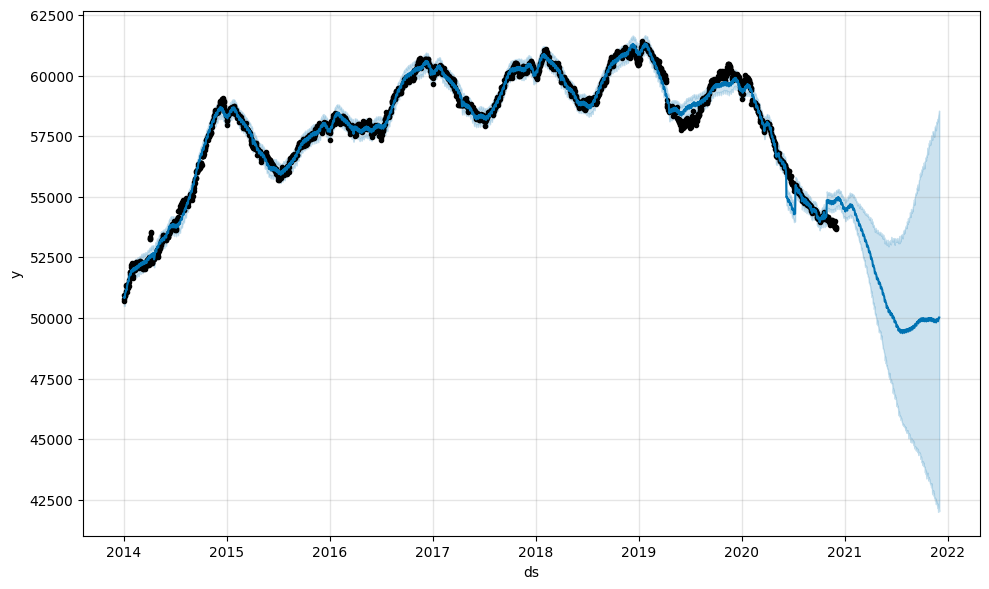

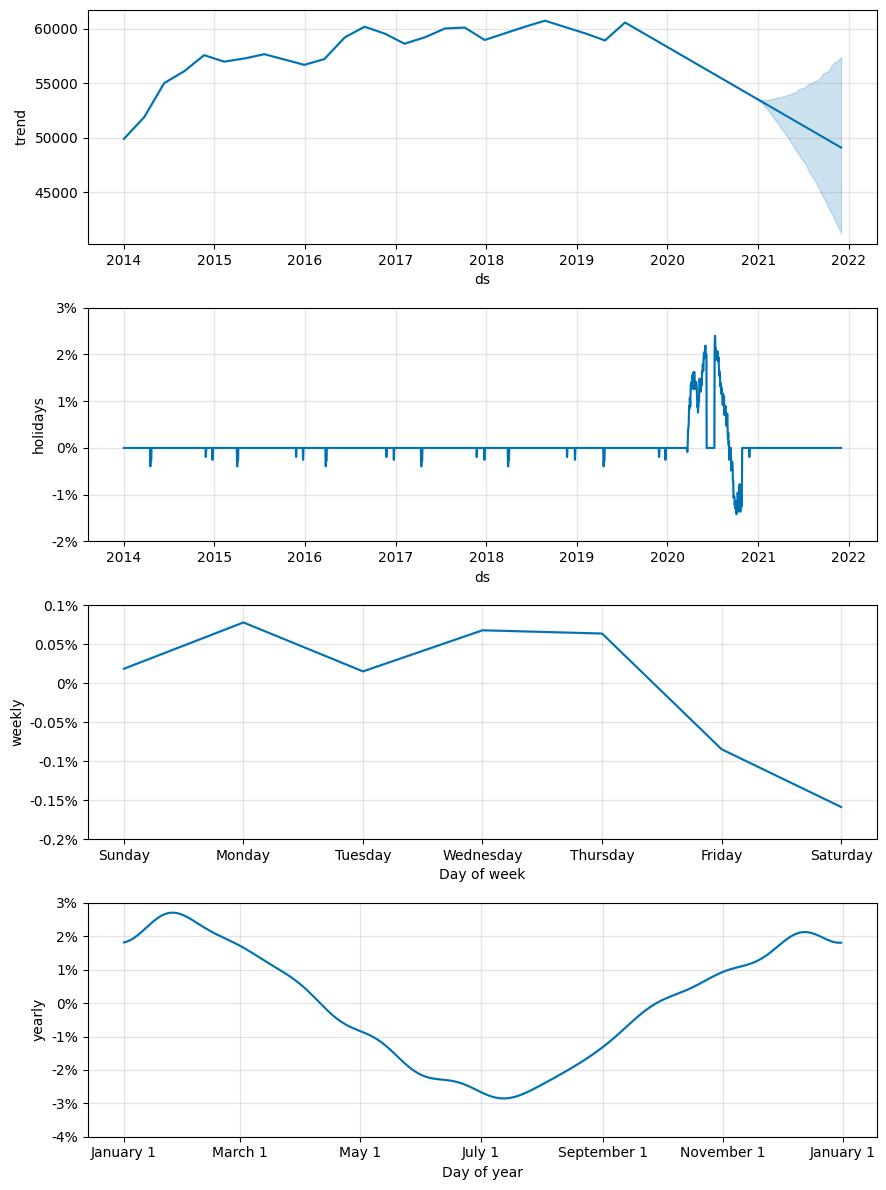

In [15]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast);
m.plot_components(forecast);

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Easter,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2887,2021-11-27,49152.213844,42000.634079,58268.318151,41421.179493,57316.307397,0.0,0.0,0.0,0.0,...,-0.001587,-0.001587,-0.001587,0.016076,0.016076,0.016076,0.0,0.0,0.0,49864.380520
2888,2021-11-28,49139.020848,42222.088510,58379.755477,41391.921642,57334.812816,0.0,0.0,0.0,0.0,...,0.000186,0.000186,0.000186,0.016567,0.016567,0.016567,0.0,0.0,0.0,49962.228448
2889,2021-11-29,49125.827852,42159.126522,58440.357490,41332.353055,57355.992525,0.0,0.0,0.0,0.0,...,0.000780,0.000780,0.000780,0.017062,0.017062,0.017062,0.0,0.0,0.0,50002.297011
2890,2021-11-30,49112.634856,42098.841552,58554.620042,41273.137392,57375.593849,0.0,0.0,0.0,0.0,...,0.000152,0.000152,0.000152,0.017555,0.017555,0.017555,0.0,0.0,0.0,49982.263540
2891,2021-12-01,49099.441860,42030.998559,58544.198110,41232.145879,57398.525017,0.0,0.0,0.0,0.0,...,0.000679,0.000679,0.000679,0.018040,0.018040,0.018040,0.0,0.0,0.0,50018.567058


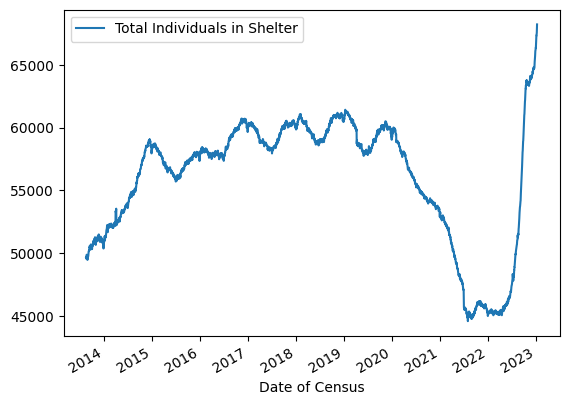

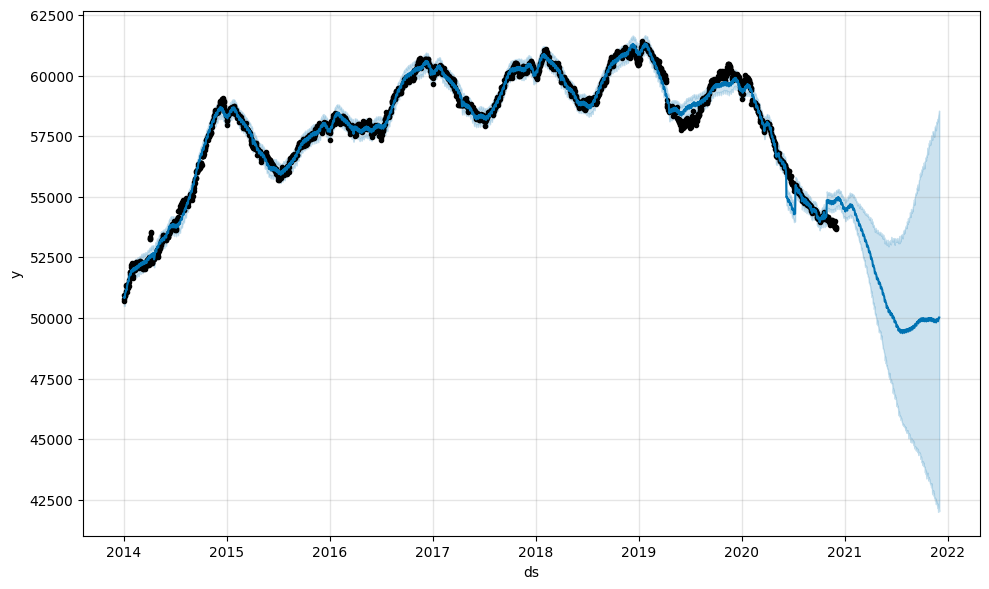

In [17]:
test = pd.read_csv('DHS_Daily_Report_2022.csv', index_col='Date of Census', parse_dates=True)
test = test['Total Individuals in Shelter']
test.plot(legend=True)
m.plot(forecast);

<AxesSubplot:title={'center':'Total Individuals in Shelter Predictions'}, xlabel='Date', ylabel='y'>

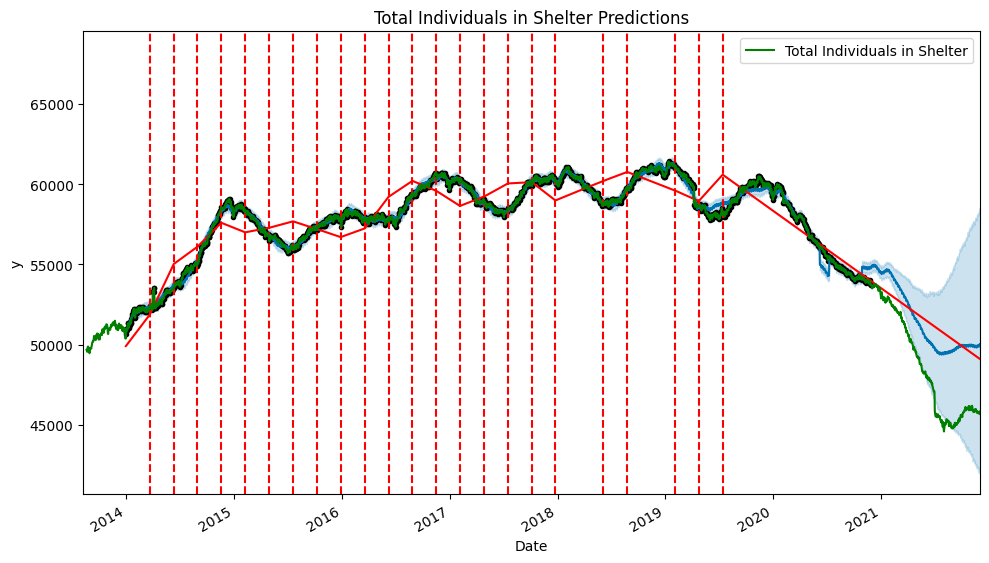

In [18]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast, xlabel='Date')
plt.xlim(right=pd.to_datetime('2021-12-01'))
plt.title("Total Individuals in Shelter Predictions")
a = add_changepoints_to_plot(fig.gca(), m, forecast)
test.plot(legend=True, color='green', xlabel='Date')

In [19]:
from statsmodels.tools.eval_measures import rmse

In [20]:
forecast[-365:]['ds']

2527   2020-12-02
2528   2020-12-03
2529   2020-12-04
2530   2020-12-05
2531   2020-12-06
          ...    
2887   2021-11-27
2888   2021-11-28
2889   2021-11-29
2890   2021-11-30
2891   2021-12-01
Name: ds, Length: 365, dtype: datetime64[ns]

In [21]:
predictions = forecast[-365:]['yhat']

In [22]:
predictions.head()

2527    54942.342444
2528    54950.665433
2529    54879.752331
2530    54847.133410
2531    54947.796008
Name: yhat, dtype: float64

In [23]:
test = pd.read_csv('DHS_Daily_Report_2022.csv', index_col='Date of Census', parse_dates=True)
test

,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
Date of Census,,,,,,,,,,,,
2021-09-29,30801,14812,45613,12291,4061,16352,8503,11156,14812,25968,1570,3293
2021-09-30,30826,14798,45624,12286,4100,16386,8500,11157,14798,25955,1565,3283
2021-10-01,30769,14815,45584,12199,4090,16289,8513,11177,14815,25992,1575,3303
2021-10-02,30648,14833,45481,12105,4067,16172,8532,11207,14833,26040,1558,3269
2021-10-03,30818,14863,45681,12210,4088,16298,8545,11228,14863,26091,1569,3292
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,45296,22025,67321,15835,4393,20228,12847,19514,22025,41539,2612,5554
2023-01-06,45347,22096,67443,15854,4368,20222,12889,19579,22096,41675,2608,5546
2023-01-07,45437,22116,67553,15896,4372,20268,12895,19617,22116,41733,2611,5552


In [24]:
m.train_holiday_names

0          Easter
1    Thanksgiving
2       Christmas
3      lockdown_1
4      lockdown_2
5      lockdown_3
6      lockdown_4
dtype: object